In [1]:
import pandas as pd
import numpy as np
import os
import time
from final import *
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [2]:
data = {}
for i in os.listdir('data'):
    if i[-3:] == 'csv':
        name = i.split('.')[0]
        data.update({name:pd.read_csv('data/'+name+'.csv',sep='\t').iloc[:,1:]})

ground_truth = data['dataset']
labels=[]
for i in range(ground_truth.shape[0]):
    if ground_truth['type'][i] == 'benign':
        labels.append(0)
    elif ground_truth['type'][i] == 'malignant':
        labels.append(1)
y=np.array(labels)

# Model selection

In [3]:
models = ['Classic','Non-classic-ave','Non-classic-max']
DR = ['DR0','DR1','DR2']
permutations = [(x,z) for x in models for z in DR]
permutations

[('Classic', 'DR0'),
 ('Classic', 'DR1'),
 ('Classic', 'DR2'),
 ('Non-classic-ave', 'DR0'),
 ('Non-classic-ave', 'DR1'),
 ('Non-classic-ave', 'DR2'),
 ('Non-classic-max', 'DR0'),
 ('Non-classic-max', 'DR1'),
 ('Non-classic-max', 'DR2')]

# $Balanced$ dataset

In [10]:
models = ['Non-classic-ave','Non-classic-max']
DR = ['DR2']
permutations = [(x,z) for x in models for z in DR]
all_b = []
all_nb = []
for index, (mod, c1) in enumerate(permutations):
    score, r, numbers = model(X = np.array(data[mod].T),
                    y = y,
                    balanced = True,
                    n_splits = 5,
                    DR = c1,
                    seed = 42,
                    model_name = mod)
    score, r, numbers1 = model(X = np.array(data[mod].T),
                    y = y,
                    balanced = False,
                    n_splits = 5,
                    DR = c1,
                    seed = 42,
                    model_name = mod)
    all_b.append(numbers)
    all_nb.append(numbers1)

129.2 1e-05
129.2 1e-05
129.2 1e-05
129.2 1e-05


In [11]:
def plot_hists(all_n,name):
    '''plots a histogram of map numbers from the KS-test reduction technique'''
    t = np.zeros((4,4,256),dtype=np.int64) #emulating input
    for i in range(t.shape[2]):
        t[:,:,i]=np.int(i)
    t1=t.reshape([-1]) #flattened
    
    def ploth(numbers,p):
        counts = t1[numbers]
        [n,b,c] = plt.hist(counts,bins=256,width=4)
        if p==1:
            plt.title("Non-classic-max\ntop maps 10: {}".format(list(np.argsort(n)[::-1][:10]+1)))
        else:
            plt.title("Non-classic-ave\ntop 10 maps: {}".format(list(np.argsort(n)[::-1][:10]+1)))
        plt.xlabel("map numbers")
        plt.ylabel("frequency")
        return n
    plt.figure(figsize=(13,3))
    plt.subplot(121)
    n = ploth(all_n[0],0)
    #plt.show()
    #plt.clf()
    plt.subplot(122)
    ploth(all_n[1],1)
    plt.savefig("thesis_text/Pictures/"+name+"_hists.png",bbox_inches='tight')
    plt.show()
    return n
    

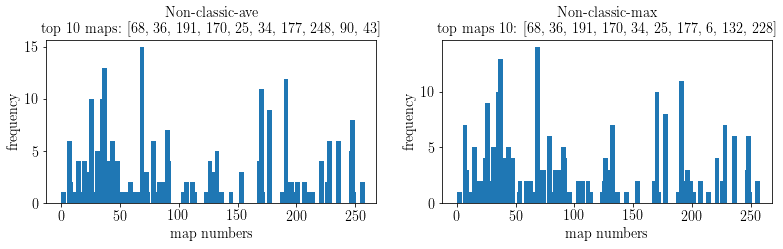

<Figure size 432x288 with 0 Axes>

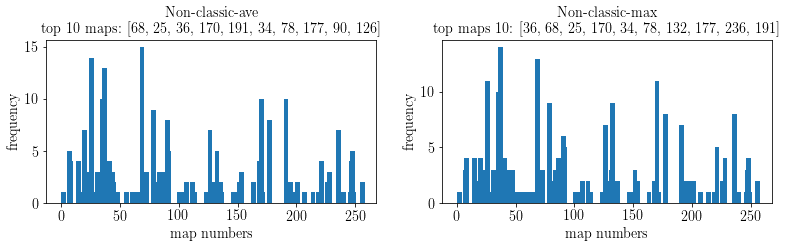

In [12]:
n=plot_hists(all_b,"balanced")
plt.clf()
n=plot_hists(all_nb,"imbalanced")

In [ ]:
def histogram_counts(param_numbers):
    counts, bins = np.histogram(param_numbers, bins=256, range=(0, 4096))
    plt.figure(figsize=(10,5))
    plt.bar(range(1,257),counts)
    plt.xlim([1,257])
    plt.title("top maps: {},{},{},{},{},{},{},{},{},{}".format(*np.argsort(counts)[:10]+1))

In [ ]:
histogram_counts(all_n[0])

In [ ]:

histogram_counts(all_n[1])


In [ ]:
t1[535]

In [ ]:
numbers

In [ ]:
#train(data, y, True, models, DR, permutations)

# $Imbalanced$ dataset

In [ ]:
#train(data, y, False, models, DR, permutations)